In [3]:
import random

In [4]:
def flip_coin():
    '''50% chance of returning true, likewise for false'''
    if random.random() > 0.5:
        return True
    else:
        return False

In [5]:
print([flip_coin() for i in range(10)]) # Test it out

[True, True, True, False, True, False, True, False, False, False]


Looks random enough to believe

In [6]:
def diff_ht(heads, total):
    '''Count of Heads minus Tails given heads count and total flips'''
    tails = total - heads
    return heads - tails

In [7]:
def sim_flip(n=16):
    '''Simulation of coin flip, going in bins of 2^n, default to running 16'''
    record = [0 for j in range(n)]
    for j in range(n):
        for i in range(2**j):
            if flip_coin():
                record[j] += 1
    return record

In [8]:
print(sim_flip()) # test it out

[1, 0, 0, 5, 7, 16, 31, 67, 136, 295, 509, 1040, 2072, 4078, 8277, 16468]


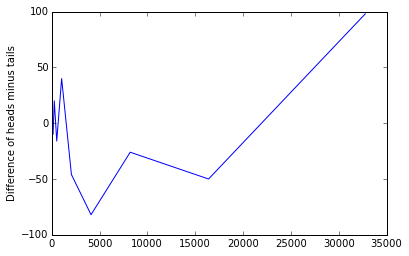

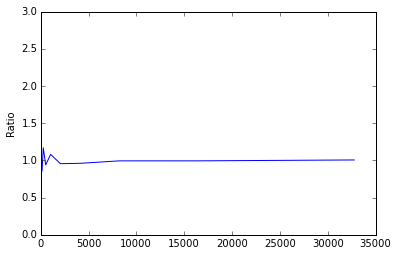

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

heads = sim_flip()
n = len(heads)
flips = [2**j for j in range(n)]
difference = [diff_ht(heads[j], flips[j]) for j in range(n)]
heads_ratio = [heads[j]/(flips[j]-heads[j]) if flips[j]-heads[j]!=0 else 0 for j in range(n)]

plt.plot(flips, difference, label="gross counts")
plt.ylabel("Difference of heads minus tails")
plt.show()
plt.plot(flips, heads_ratio, label="heads-tails ratio")
plt.ylabel("Ratio")
plt.show()

Notes:
The first graph shows a growing mismatch between the number of heads and tails. This is because of the random nature of the experiment combined with the increasing number of individual trials.
The second graph is mostly constant because the fraction of flips that yield heads is mostly constant at 50% under all cirumstances. However, with few flips, there is more random deviation from the expected value.

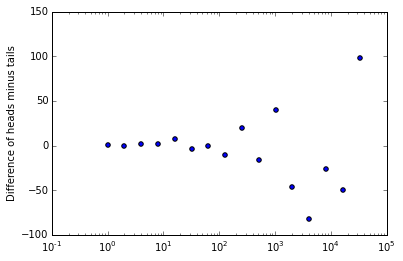

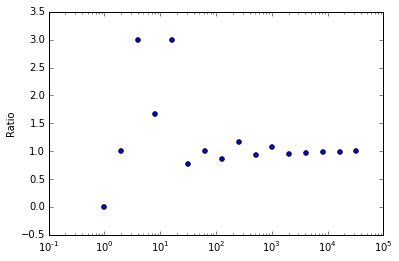

In [14]:
plt.scatter(flips, difference, label="gross counts")
plt.ylabel("Difference of heads minus tails")
plt.xscale("log")
plt.show()
plt.scatter(flips, heads_ratio, label="heads-tails ratio")
plt.ylabel("Ratio")
plt.xscale("log")
plt.show()

Notes:
Changing the x-axis to log scale means that only the last few trials will appear to have a substantial heads to tails difference. The smaller number trials are all indistinguishable from zero.
The second graph shows the severity of the deviation from the expected fraction of heads, with the trials have relatively equal x-axis spacing in spite of using vastly different numbers of trials. This shows a satisfying approach to a small band around the expected yield.

In [17]:
import statistics as st

trial_set = [[] for j in range(16)]
for k in range(20):
    heads = sim_flip()
    for j in range(16):
        if heads[j] == 2**j:
            trial_set[j].append(0)
        else:
            trial_set[j].append(heads[j]/(2**j - heads[j])) # ratio of heads to tails
trial_means = []
trial_stds = []
for j in range(16):
    trials = trial_set[j]
    trial_means.append(sum(trials)/len(trials))
    trial_stds.append(st.stdev(trials))
print(trial_means)
print(trial_stds)

[0.0, 0.45, 1.8333333333333333, 0.9504761904761905, 1.424078144078144, 0.9407505188310143, 1.1140490045490485, 1.0547328059807741, 0.9712713016139581, 0.9933730619277368, 1.004476462090722, 0.9933417251448216, 1.0060118508500602, 1.0058798279739936, 0.9997280681443707, 1.0011881181831006]
[0.0, 0.5104177855340405, 1.2354415362426845, 0.8102081730551748, 1.398236552392549, 0.2506768382460566, 0.28486131684204186, 0.2127415588009743, 0.1261963526495149, 0.09146736992523168, 0.06155140140927432, 0.04187575571658218, 0.03502560061777732, 0.020511465877775806, 0.011013650615388915, 0.007651790275719806]


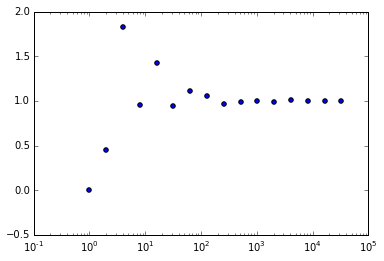

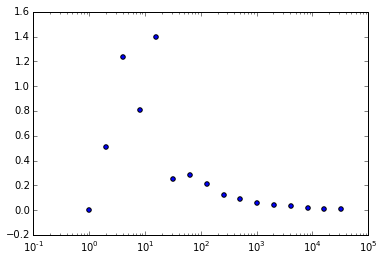

In [18]:
plt.scatter(flips, trial_means, label="gross counts")
plt.xscale("log")
plt.show()
plt.scatter(flips, trial_stds, label="heads-tails ratio")
plt.xscale("log")
plt.show()

Notes:
First graph - The ratio of heads to tails quickly moves to 1.0 over a long number of trials.
Second graph - The standard deviation of the ratio moves to 0.0 over a long number of trials. This tells us that for a large number of flips, there is little variation in the outcome (if the outcome is defined as the H/T ratio)

In [59]:
trial_1h = [0 for i in range(100000)]
trial_1k = [0 for i in range(100000)]
for k in range(100000):
    trial_1h[k] = sum(flip_coin() for i in range(100))/100
    trial_1k[k] = sum(flip_coin() for i in range(1000))/1000
print(str(trial_1h[0])+" "+str(trial_1k[0]))

0.51 0.498


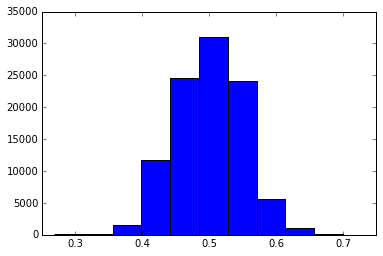

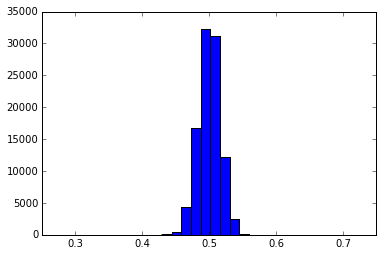

In [73]:
plt.hist(trial_1h)
plt.axis((.25,.75,0,35000))
plt.show()
plt.hist(trial_1k)
plt.axis((.25,.75,0,35000))
plt.show()

Notes:
In these two graphs, I made the window the same size. This helps to illustrate the smaller width of the peak for the case with 1,000 flips in each trial. There is much tighter grouping of the measured rate of heads with an increased number of trials.

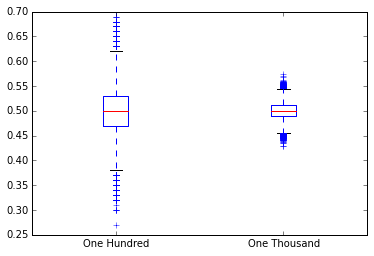

In [66]:
plt.boxplot([trial_1h, trial_1k])
plt.xticks([1,2], ['One Hundred','One Thousand'])
plt.show()

Notes:
This is another way of telling the same story as the last set of graphs. Instead of presenting a histogram, here we have marks that show the distribution of certain percentiles. Again, the larger number of trials demonstrates tighter grouping of measured heads rate.